# Data Exploration and Preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

In order to be sure all images are the same size I resized them to 128 by 128. The dataset claimed all images were already sized, however I decided it makes sense to be sure.

In [22]:
# Load in paths
train_dir = "/content/drive/MyDrive/Colab Notebooks/Final Project/machine-learning-final/PandasBears/Test"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Final Project/machine-learning-final/PandasBears/Train"

img_size = 128    # Image resize for more managable
batch_size = 32   # Number of images per batch

# Load in training dataset
train = tf. keras.preprocessing.image_dataset_from_directory(
            train_dir,
            image_size=(img_size, img_size),
            shuffle=True,
            batch_size=batch_size)

# Load in testing dataset
test = tf. keras.preprocessing.image_dataset_from_directory(
            test_dir,
            image_size=(img_size, img_size),
            shuffle=True,
            batch_size=batch_size)

Found 100 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


The PandasBears dataset contains 640 images in 2 classes. The data is first split by training and testing data with 128 training images and 512 testing images.

In [31]:
# Get the total number of images and classes
num_classes = len(train.class_names)
class_names = train.class_names

total_training_images = tf.data.experimental.cardinality(train).numpy() * batch_size  # Total images in training dataset
total_testing_images = tf.data.experimental.cardinality(test).numpy() * batch_size  # Total images in testing dataset
total_images = total_training_images + total_testing_images  # Total images in dataset

print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}\n")
print(f"Total training images: {total_training_images}")
print(f"Total testing images: {total_testing_images}")
print(f"Total images: {total_images}")

Number of classes: 2
Class names: ['Bears', 'Pandas']

Total training images: 128
Total testing images: 512
Total images: 640


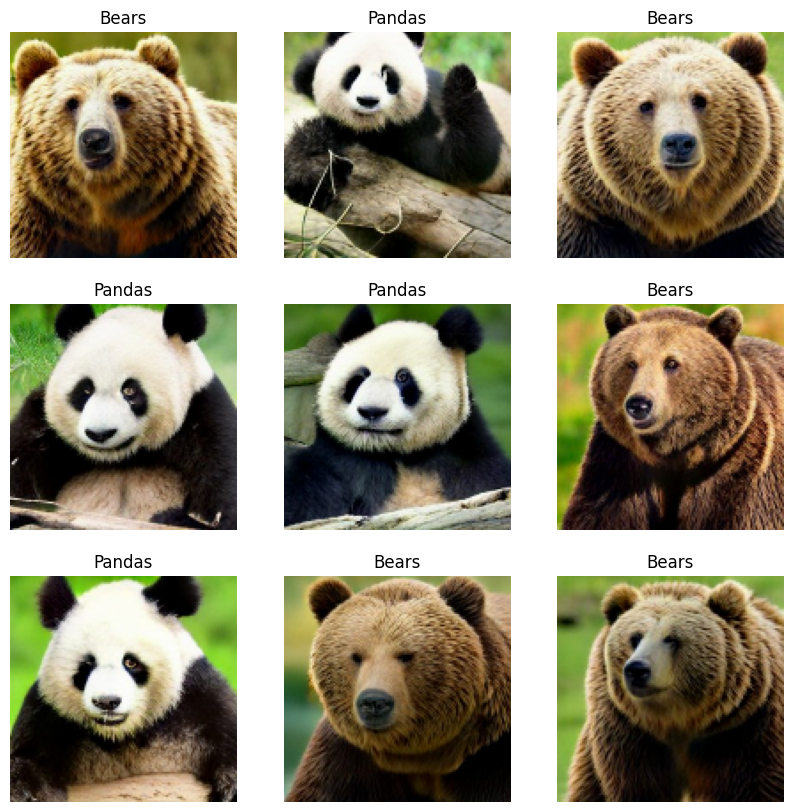

In [18]:
# Display a few sample images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train.class_names[labels[i]])
        plt.axis("off")
plt.show()

The distribution of pandas vs bears is a perfect split of 50 - 50. This means 64 each in the training and 256 each in the testing.


In [19]:
# Get the class distribution (number of images per class)
class_counts = {}
for images, labels in train:
    for label in labels.numpy():
        class_counts[train.class_names[label]] = class_counts.get(train.class_names[label], 0) + 1

print("Class Distribution:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Class Distribution:
Pandas: 50
Bears: 50


In [20]:
# Calculate and display some basic image statistics (mean, standard deviation)
image_list = []
for images, labels in train:
    for image in images.numpy():
        image_list.append(image)

all_images = np.array(image_list)

# Average brightness or intesisty of the images
print(f"Mean pixel value: {np.mean(all_images)}")

# Variations of spread pixel values around the mean, higher = more contrast and variation
print(f"Standard deviation of pixel values: {np.std(all_images)}")

Mean pixel value: 101.69307708740234
Standard deviation of pixel values: 81.1673583984375


Checking for missing or corrupted images showed no corrupted images for either dataset. I did this by attempting to load each image, if it doesn't load it is corrupted.


In [33]:
import os
from PIL import Image

def check_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Verify that the image is not corrupted
        return True
    except (IOError, SyntaxError) as e:
        print(f"Corrupted image file: {file_path}")
        return False

# Testing the train set
for root, dirs, files in os.walk(train_dir):
    for file in files:
        file_path = os.path.join(root, file)
        check_image(file_path)

# Testing the test set
for root, dirs, files in os.walk(test_dir):
    for file in files:
        file_path = os.path.join(root, file)
        check_image(file_path)
